In [1]:
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import tensorboard

# from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
# from sklearn.utils import shuffle

print('TensorFlow version: ', tf.__version__)
print('Keras version: ', keras.__version__)
print('Tensorboard version:', tensorboard.__version__)

%matplotlib inline

%load_ext autoreload
%autoreload 2 # automatically reload functions each time before running cell

TensorFlow version:  2.0.0
Keras version:  2.2.4-tf
Tensorboard version: 2.0.0


Run this in the project root to import functions from the src folder (more info [here](https://medium.com/@rrfd/cookiecutter-data-science-organize-your-projects-atom-and-jupyter-2be7862f487e)): <br/>
$ pip3 install --editable .

In [2]:
from src.data import data_prep

In [3]:
class_normal = 6

# class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

fashion_mnist = keras.datasets.fashion_mnist
data_model = data_prep.DataPrep(fashion_mnist,class_normal, print_shapes=True)

(X_train, y_train, 
 X_train_slim, y_train_slim,
 X_val, y_val,
 X_val_slim, y_val_slim,
 X_test,y_test) = data_model.train_test_split()

X_val shape: (5000, 28, 28)
y_val shape: (5000,)
X_val_slim shape: (506, 28, 28)
y_val_slim shape: (506,)
X_train shape: (50000, 28, 28)
y_train shape: (50000,)
X_train_slim shape: (5005, 28, 28)
y_train_slim shape: (5005,)


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
from src.models import sparse_kl


In [6]:
sparse_kl_ae = sparse_kl.model_fit(X_train_slim, X_val_slim, seed=42, epochs=2)

Train on 5005 samples, validate on 506 samples
Epoch 1/2
5005/5005 [==============================] - 2s 326us/sample - loss: 0.4744 - rounded_accuracy: 0.8203 - val_loss: 0.4094 - val_rounded_accuracy: 0.8812
Epoch 2/2
5005/5005 [==============================] - 0s 93us/sample - loss: 0.3989 - rounded_accuracy: 0.8877 - val_loss: 0.3977 - val_rounded_accuracy: 0.8890


In [7]:
from src.models import threshold

class_to_remove = [i for i in range(0,10)]
class_to_remove.remove(class_normal)
class_to_remove = np.array(class_to_remove,dtype='uint8')

model = threshold.SelectThreshold(sparse_kl_ae, X_val, y_val, X_val_slim, class_to_remove, class_normal, class_names)

(5000, 28, 28)


Best threshold value: 0.037950122505426405 	ROC score: 74.43%


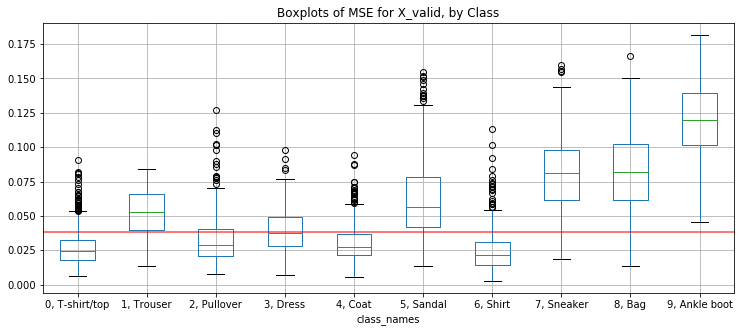


Confusion Matrix:
[[2841 1670]
 [  69  420]]
Best threshold value: 0.16710081696510315 	ROC score: 73.61%


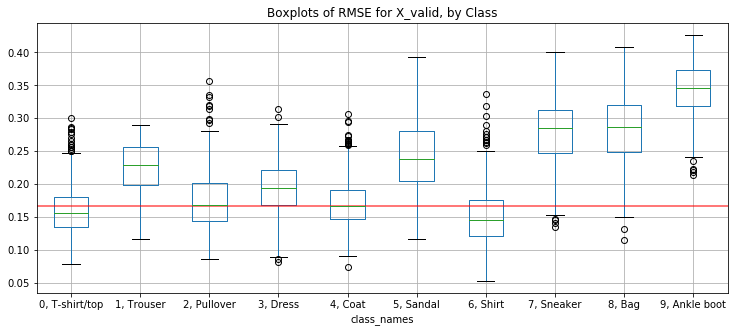


Confusion Matrix:
[[3505 1006]
 [ 149  340]]
Best threshold value: 4.678822875022888 	ROC score: 73.61%


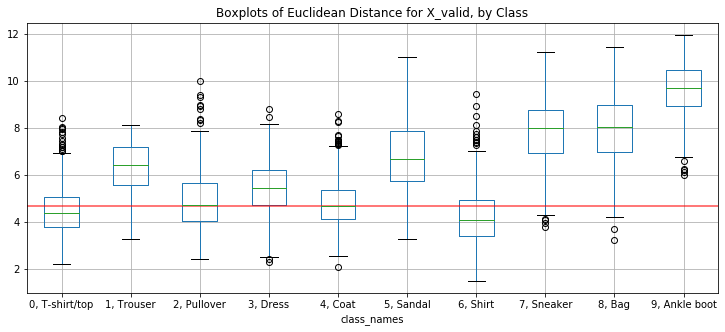


Confusion Matrix:
[[3505 1006]
 [ 149  340]]


In [8]:
df = model.compare_error_method(show_results=True, grid_iterations=10)